In [59]:
#import required libraries 
#import OpenCV library
import cv2
#import matplotlib library
import matplotlib.pyplot as plt
%matplotlib inline

In [60]:
# cv2.cvtColor is an OpenCV function to convert images to different color spaces
def convertToRGB(img): 
    return cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [61]:
def detect_faces(f_cascade, colored_img, scaleFactor = 1.1):
 #just making a copy of image passed, so that passed image is not changed 
 img_copy = colored_img.copy()          
 
 #convert the test image to gray image as opencv face detector expects gray images
 gray = cv2.cvtColor(img_copy, cv2.COLOR_BGR2GRAY)          
 
 #let's detect multiscale (some images may be closer to camera than others) images
 faces = f_cascade.detectMultiScale(gray, scaleFactor=scaleFactor, minNeighbors=5);          
 
 #go over list of faces and draw them as rectangles on original colored img
 for (x, y, w, h) in faces:
      cv2.rectangle(img_copy, (x, y), (x+w, y+h), (0, 255, 0), 2)              
 
 return img_copy

# 作業: 
1. 使用faces = haar_face_cascade.detectMultiScale(gray_img, scaleFactor=1.1, minNeighbors=5); 
修改 scaleFactor, minNeighbor兩個參數計算 test5.jpg 有幾張臉

2. load cascade classifier training file for haarcascade 
3. load cascade classifier training file for lbpcascade 


Faces found:  6


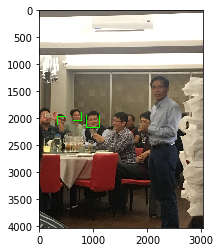

In [62]:
#load test5 image 
test5 = cv2.imread('data/test5.jpg')
gray_img = cv2.cvtColor(test5, cv2.COLOR_BGR2GRAY)

#load cascade classifier training file for haarcascade 
haar_face_cascade = cv2.CascadeClassifier('data/haarcascade_frontalface_alt.xml')

faces = haar_face_cascade.detectMultiScale(gray_img, scaleFactor=1.1, minNeighbors=2);  

#go over list of faces and draw them as rectangles on original colored 
for (x, y, w, h) in faces:     
         cv2.rectangle(test5, (x, y), (x+w, y+h), (0, 255, 0), 2)
        #let's detect multiscale (some images may be closer to camera than others) images 
#print the number of faces found 
print('Faces found: ', len(faces))
 
#call our function to detect faces 
faces_detected_img = detect_faces(haar_face_cascade, test5)  
 
#convert image to RGB and show image 
plt.imshow(convertToRGB(faces_detected_img))

Faces found:  7


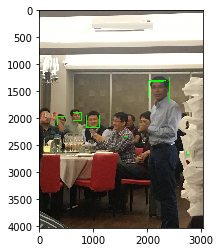

In [63]:
#load cascade classifier training file for lbpcascade 
lbp_face_cascade = cv2.CascadeClassifier('data/lbpcascade_frontalface.xml')

faces2 = lbp_face_cascade.detectMultiScale(gray_img, scaleFactor=1.8, minNeighbors=1);  

#go over list of faces and draw them as rectangles on original colored 
for (x, y, w, h) in faces2:     
         cv2.rectangle(test5, (x, y), (x+w, y+h), (0, 255, 0), 2)
        #let's detect multiscale (some images may be closer to camera than others) images 
#print the number of faces found 
print('Faces found: ', len(faces2))
 
#call our function to detect faces 
faces_detected_img2 = detect_faces(lbp_face_cascade, test5)  
 
#convert image to RGB and show image 
plt.imshow(convertToRGB(faces_detected_img2))